*WINE QUALITY PREDICTION (RED-WINE)*

Using Inbuilt Linear Regression Model

In [1]:
# Importin necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# creating dataframe and checking the existance of null values
df1 = pd.read_csv('C:\\Users\\mahes\\OneDrive\\Desktop\\Mahesh_Works\\Wine-Quality-Prediction\\wineQualityReds.csv',encoding = 'utf-8')
print(df1.shape)
df1.isnull().sum()

(1599, 12)


fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
df1.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df1.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


C:\Users\mahes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


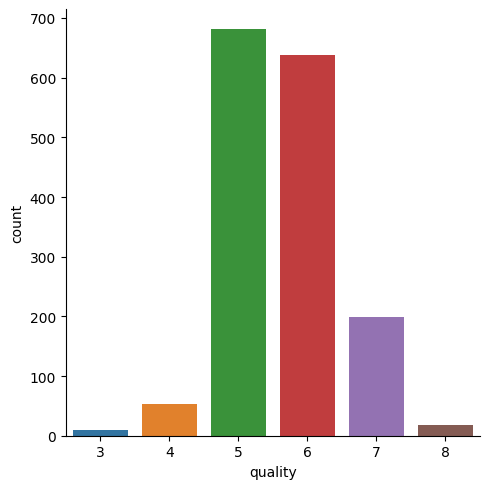

In [5]:
# number of values for each quality
sns.catplot(x='quality', data = df1, kind = 'count')

In [6]:
# values taken by output
df1['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<Axes: xlabel='quality', ylabel='alcohol'>

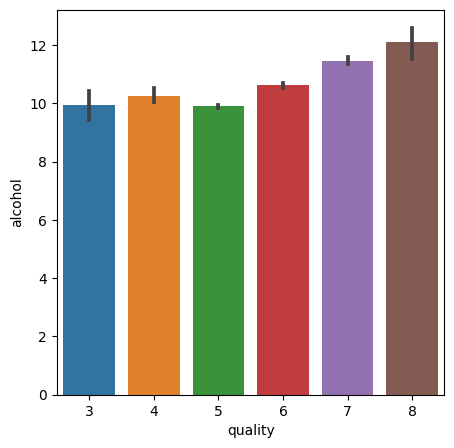

In [7]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = df1)

<Axes: xlabel='quality', ylabel='alcohol'>

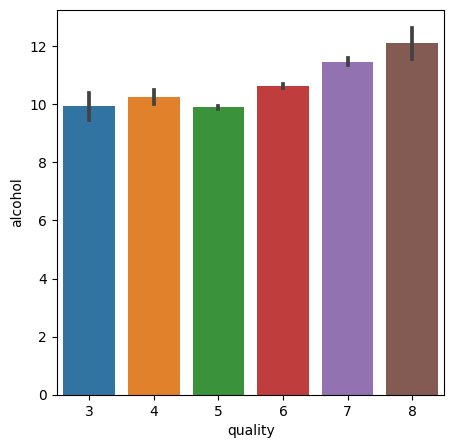

In [8]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'alcohol', data = df1)

In [9]:
X = df1.drop('quality',axis=1)
Y = df1['quality']
# spliting into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
# Build the linear regression model using LinearRegression()
linear_regressor = LinearRegression()
# Fit the model to our training data
linear_regressor.fit(X_train, Y_train)
# Print the values of coefficients of each feature
features=df1.loc[0].drop(['quality'])
coeffecients = pd.DataFrame(linear_regressor.coef_,features)
coeffecients.columns=['cofffecients']
print(coeffecients)
print("\nintercept :",linear_regressor.intercept_)

         cofffecients
0                    
7.4000       0.044872
0.7000      -1.078805
0.0000      -0.236796
1.9000       0.017702
0.0760      -1.343643
11.0000      0.004362
34.0000     -0.003010
0.9978     -25.615441
3.5100      -0.332738
0.5600       0.790893
9.4000       0.275023

intercept : 29.27954306250125


In [11]:
# predicting output for train and test samples
linear_train_pred = linear_regressor.predict(X_train)
linear_test_pred = linear_regressor.predict(X_test)     

In [12]:
# The MSE for training and testing sets need to be similar for good model
linear_mse_train = metrics.mean_squared_error(linear_train_pred,Y_train)
linear_mse_test = metrics.mean_squared_error(linear_test_pred, Y_test)
print("tain_mse: ",linear_mse_train)
print("test_mse: ",linear_mse_test)

tain_mse:  0.42034431070015993
test_mse:  0.4066279806267021


In [13]:
linear_test_predicted_data = np.round_(linear_test_pred)
test_data_accuracy = accuracy_score(linear_test_predicted_data, Y_test)
print("accuracy of testing set :",test_data_accuracy)
linear_train_predicted_data = np.round_(linear_train_pred)
train_data_accuracy = accuracy_score(linear_train_predicted_data,Y_train)
print("accuracy of training set :",train_data_accuracy)

accuracy of testing set : 0.603125
accuracy of training set : 0.5863956215793589


In [14]:
# Calculating other error functions
print('Mean Absolute Error:', metrics.mean_absolute_error(linear_test_pred, Y_test))
print('Mean Squared Error:', metrics.mean_squared_error(linear_test_pred, Y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(linear_test_pred, Y_test)))

Mean Absolute Error: 0.49006496072341915
Mean Squared Error: 0.4066279806267021
Root Mean Squared Error: 0.6376738826600178


Using implemented Linear Regression model

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df1 = pd.read_csv('C:\\Users\\mahes\\OneDrive\\Desktop\\Mahesh_Works\\Wine-Quality-Prediction\\wineQualityReds.csv',encoding = 'utf-8')
df = pd.DataFrame()
df[0] = [1 for i in range(len(df1))]
for i in range(df1.columns.size):
  df[i+1] = df1.iloc[:,i]

# before normalization
# print(df.head())

# Normalising data
list1 = []
maxval = -1
for i in range(df.columns.size-1):
  maxval = max(maxval,df[i].max())
for i in range(1,df.columns.size-1):
  df[i] = df[i]/maxval

# spliting into train,validation,test set
train_set = df.sample(frac=0.6)
remaining = df.drop(train_set.index)
validation_set = remaining.sample(frac=0.4)
test_set = remaining.drop(validation_set.index)

# after normalization
print(df.head())
     

   0         1         2         3         4         5         6         7   \
0   1  0.025606  0.002422  0.000000  0.006574  0.000263  0.038062  0.117647   
1   1  0.026990  0.003045  0.000000  0.008997  0.000339  0.086505  0.231834   
2   1  0.026990  0.002630  0.000138  0.007958  0.000318  0.051903  0.186851   
3   1  0.038754  0.000969  0.001938  0.006574  0.000260  0.058824  0.207612   
4   1  0.025606  0.002422  0.000000  0.006574  0.000263  0.038062  0.117647   

         8         9         10        11  12  
0  0.003453  0.012145  0.001938  0.032526   5  
1  0.003449  0.011073  0.002353  0.033910   5  
2  0.003450  0.011280  0.002249  0.033910   5  
3  0.003453  0.010934  0.002007  0.033910   6  
4  0.003453  0.012145  0.001938  0.032526   5  


In [16]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1599.0,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,1.0,0.028788,0.001826,0.000938,0.008785,0.000303,0.054931,0.160788,0.003449,0.011457,0.002277,0.036066,5.636023
std,0.0,0.006025,0.000620,0.000674,0.004879,0.000163,0.036194,0.113825,0.000007,0.000534,0.000587,0.003687,0.807569
min,1.0,0.015917,0.000415,0.000000,0.003114,0.000042,0.003460,0.020761,0.003426,0.009481,0.001142,0.029066,3.000000
25%,1.0,0.024567,0.001349,0.000311,0.006574,0.000242,0.024221,0.076125,0.003445,0.011107,0.001903,0.032872,5.000000
50%,1.0,0.027336,0.001799,0.000900,0.007612,0.000273,0.048443,0.131488,0.003449,0.011453,0.002145,0.035294,6.000000
75%,1.0,0.031834,0.002215,0.001453,0.008997,0.000311,0.072664,0.214533,0.003453,0.011765,0.002526,0.038408,6.000000
max,1.0,0.055017,0.005467,0.003460,0.053633,0.002114,0.249135,1.000000,0.003473,0.013875,0.006920,0.051557,8.000000


In [17]:
class Linear_regression2 : 
  def __init__(self,alpha,rho,epoch,data):
    self.alpha,self.rho,self.epoch=alpha,rho,epoch
    self.data = data
    self.m = len(self.data)
    self.n = data.columns.size
    arr = np.random.uniform(-0.3,0.3,self.n-1)
    self.w = pd.Series(arr)
    self.error = [0.0]
    self.Y_Predict = self.predict()

  def iterate(self):
    i=0
    error_dif = self.cur_error() - self.error[len(self.error)-1]
    while((self.rho) or i==0):
      self.update()
      i+=1
      self.error.append(self.cur_error())
  
  def update(self):
    self.Y_Predict = self.predict()
    for i in range(len(self.w)):
      self.w[i]=self.w[i]-(self.alpha/self.m)*((self.Y_Predict-self.data[self.n-1]).dot(self.data[i]))
    # for i in range (self.m):
    #   for j in range (len(self.w)):
    #      self.w[j]=self.w[j]-(self.alpha)*((self.Y_Predict[i]-self.data.iloc[i,self.n-1]))*self.data.iloc[i,j]
      
     
  def predict(self):
    arr =[]
    for i in range (self.m):
      temp=pd.Series(self.data.iloc[i])
      temp.pop(self.n-1)
      arr.append(temp.dot(self.w))
    return arr

  def cur_error(self):
    psum=0
    for i in range(self.m):
      psum = psum  + (self.Y_Predict[i]-self.data.iloc[i,self.n-1])**2
    psum = psum/(2*self.m)
    return psum

In [18]:
rho_arr = [0.8,0.5,0.9,0.6,0.7]
alpha_arr = [0.015,0.005,0.03,0.02,0.01]
epoch_arr = [160,155,130,150,140]

w_arr = []
error_arr = []

for i in range(5):
  model = Linear_regression2(alpha_arr[i],rho_arr[i],epoch_arr[i],train_set)
  model.iterate()
  w_arr.append(model.w)
  error_arr.append(model.cur_error())

In [ ]:
print(w_arr)
print(error_arr)

In [ ]:
def find_error(w,dataframe):
  tarr = w.values
  w = pd.DataFrame(tarr.reshape(w.size,1))
  tempdf = dataframe.drop(columns=[dataframe.columns.size-1])
  predict =  tempdf.dot(w)
  psum=0
  for i in range(len(dataframe)):
    psum=psum + (predict.iloc[i,0]-dataframe.iloc[i,dataframe.columns.size-1])**2
  
  psum = 1/(2*(len(dataframe)))*psum
  return psum

In [ ]:
# initialising 0th index as best then iterating to find best one (best w => best alpha)
best = 0
min_error = find_error(w_arr[0],validation_set)
for i in range(1,5):
  e=find_error(w_arr[i],validation_set)
  if min_error-e>0:
    min_error=e
    best=i

Results

In [ ]:
# prints the best index
print(best)

Finding MSE for different hyperparameters.

In [ ]:
print("MSE for train,validation,test set with different set of hyper parameters\n")
print("     Train set             Validation set               Test set")
for i in range(0,5):
  e1=find_error(w_arr[i],train_set)
  e2=find_error(w_arr[i],validation_set)
  e3=find_error(w_arr[i],test_set)
  print(e1,"     ",e2,"       ",e3)

Finding Accuracy with different combination of rho,alpha and epoch

In [ ]:
def prediction(w,data):
  arr=[]
  for i in range(len(data)):
    temp1=pd.Series(w)
    temp2=data.iloc[i,:].drop([12])
    arr.append(temp2.dot(temp1))
  return arr  

In [ ]:
for i in range(0,5):
  predicted_values1=np.round_(prediction(w_arr[i],train_set))
  predicted_values2=np.round_(prediction(w_arr[i],validation_set))
  predicted_values3=np.round_(prediction(w_arr[i],test_set))

  total_ct1 = len(train_set)
  correct_ct1 = 0
  total_ct2 = len(validation_set)
  correct_ct2 = 0
  total_ct3 = len(test_set)
  correct_ct3 = 0
  for i in range(len(train_set)):
    if(train_set.iloc[i][len(df.columns)-1]==predicted_values1[i]):
      correct_ct1+=1
  for i in range(len(validation_set)):
    if(validation_set.iloc[i][len(df.columns)-1]==predicted_values2[i]):
      correct_ct2+=1
  for i in range(len(test_set)):
    if(test_set.iloc[i][len(df.columns)-1]==predicted_values3[i]):
      correct_ct3+=1
  
  print("Accuracy1 : ",(correct_ct1/total_ct1)*100)
  print("Accuracy2 : ",(correct_ct2/total_ct2)*100)
  print("Accuracy3 : ",(correct_ct3/total_ct3)*100)
  print("------------------------------------------")
     